# stock market analysis

In [12]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Inference**
- here we use yfinance library to fetch historical stock data from yahoo finance
- we don'tneed to download it manually
- here, we fetch apple stock data(APPL) and use pandas for further analysis

In [5]:
pip install yfinance pandas

     -------------------------------------- 73.0/73.0 kB 129.4 kB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ---------------------------------------- 3.0/3.0 MB 339.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 112.2/112.2 kB 596.1 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136948 sha256=97b6cfdbfa2b3a12f55295f4fdb6629bd990c354207e40ddf70a72075690258f
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f3\60\5b\41a9bbd32037a7211f550249f5dc798e55c20d42c49deeaf25
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: r

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [1]:
# to get historical data from APPL
import yfinance as yf

data=yf.download('AAPL',start='2020-01-01',end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [2]:
# to show top 5 records 
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


In [3]:
# to show bottom five records
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.065674,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.038712,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.127579,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,175.962402,59773000
2021-12-31,178.089996,179.229996,177.259995,177.570007,175.340317,64062300


In [5]:
# shape of data
data.shape

(505, 6)

**Inference**
- which shows that we have 505 rows and 6 columns

In [6]:
# columns
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [53]:
# check for numerical columns
d1=data.select_dtypes(include="number")
d1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.065674,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.038712,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.127579,62348900


In [55]:
# check for categorical columns
d2=data.select_dtypes(include="object")
d2

""
Date
2020-01-02
2020-01-03
2020-01-06
2020-01-07
2020-01-08
...
2021-12-27
2021-12-28
2021-12-29


**Inference**
- which shows there's only one categorical columns present which is date

**Attributes Description**

1. **Open:**
   - Description: The initial price of the financial instrument at the beginning of a given period.

2. **High:**
   - Description: The highest recorded price of the financial instrument during a specific period.

3. **Low:**
   - Description: The lowest recorded price of the financial instrument during a specific period.

4. **Close:**
   - Description: The final price of the financial instrument at the end of a given period.

5. **Adj Close:**
   - Description: The Adjusted closing price is historical data, and its primary purpose is to show how the stock's value has changed over time.
    
6. **Volume:**
   - Description: The total number of shares traded during a specific period, indicating the level of market activity.


In [7]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [10]:
# check for null values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Inference**
- we don't have any null value here within dataset

<function matplotlib.pyplot.show(close=None, block=None)>

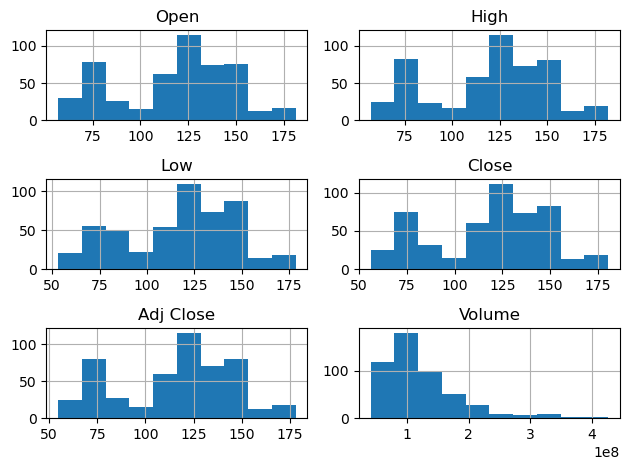

In [13]:
# to show histogram
data.hist()

# to adjust subplots(title,labels,tick labels) by adding some space between them
plt.tight_layout()

# create a figure object that holds multiple subplots
plt.figure

# show plot
plt.show

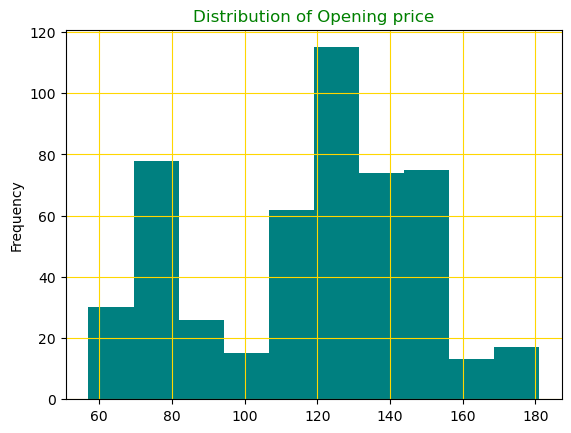

In [80]:
data.Open.plot(kind="hist",color="teal")

plt.title("Distribution of Opening price",color="green")

plt.grid(color="gold")

plt.show()

**Inference**
- which shows there are so many times when opening price is betweeen 125 to 130 
- there are some cases where opening price is arround 100 and between 155 to 180

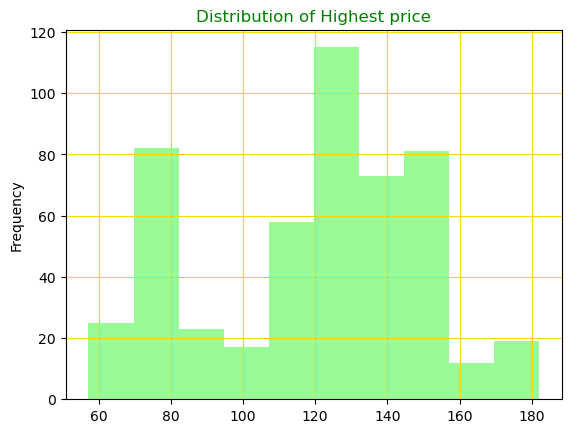

In [82]:
data.High.plot(kind="hist",color="palegreen")

plt.title("Distribution of Highest price",color="green")

plt.grid(color="gold")

plt.show()

**Inference**
- which shows there are so many times when highest price is betweeen 125 to 130  and 50 to 80
- there are some cases where highest price is arround 100 and between 155 to 180

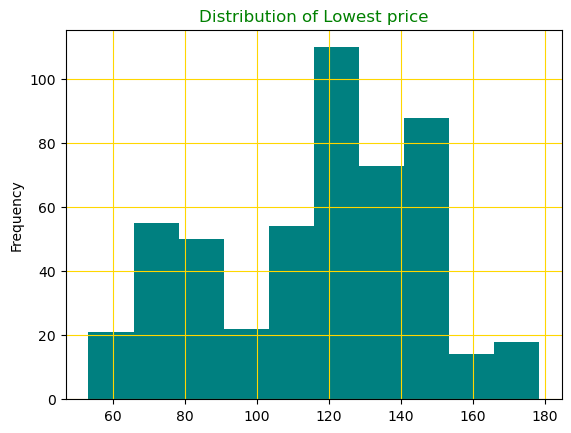

In [83]:
data.Low.plot(kind="hist",color="teal")

plt.title("Distribution of Lowest price",color="green")

plt.grid(color="gold")

plt.show()

**Inference**
- which shows there are so many times when low price is betweeen 125 to 130 and 140 to 155
- there are some cases where opening price is arround 90 to 100 and between 155 to 180

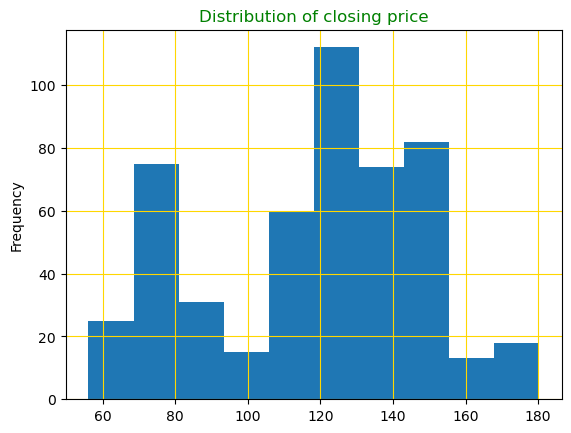

In [77]:
data.Close.plot(kind="hist")

plt.title("Distribution of closing price",color="green")

plt.grid(color="gold")

plt.show()

**Inference**
- which shows there are so many times when closing price is betweeen 125 to 130 
- more times when arround 58 where closing price is between 70 to 80
- there are some cases where opening price is arround 100 and between 155 to 180

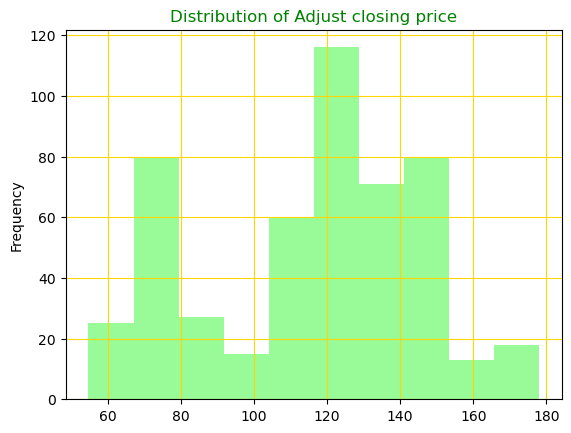

In [84]:
data["Adj Close"].plot(kind="hist",color="palegreen")

plt.title("Distribution of Adjust closing price",color="green")

plt.grid(color="gold")

plt.show()

**Inference**
- which shows there are 115 times when adj closing price is betweeen 125 to 130 
- there are some cases  around 10 to 15 where adj closing price is arround 100 and 18 times when it is between 155 to 180
- 80 times when adj closing is between 70 to 90

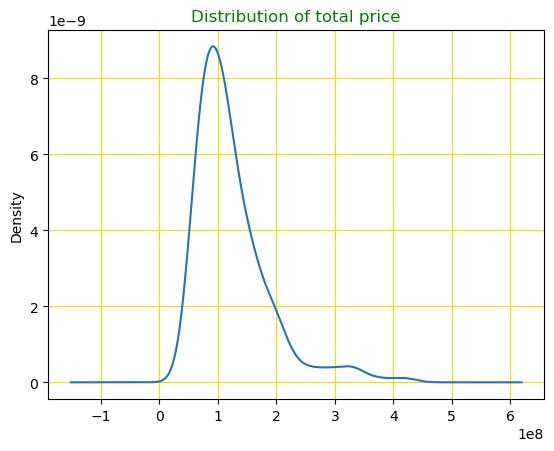

In [79]:
data.Volume.plot(kind="kde")

plt.title("Distribution of total price",color="green")

plt.grid(color="gold")

plt.show()

**Inference**
- which shows total price is increased by time

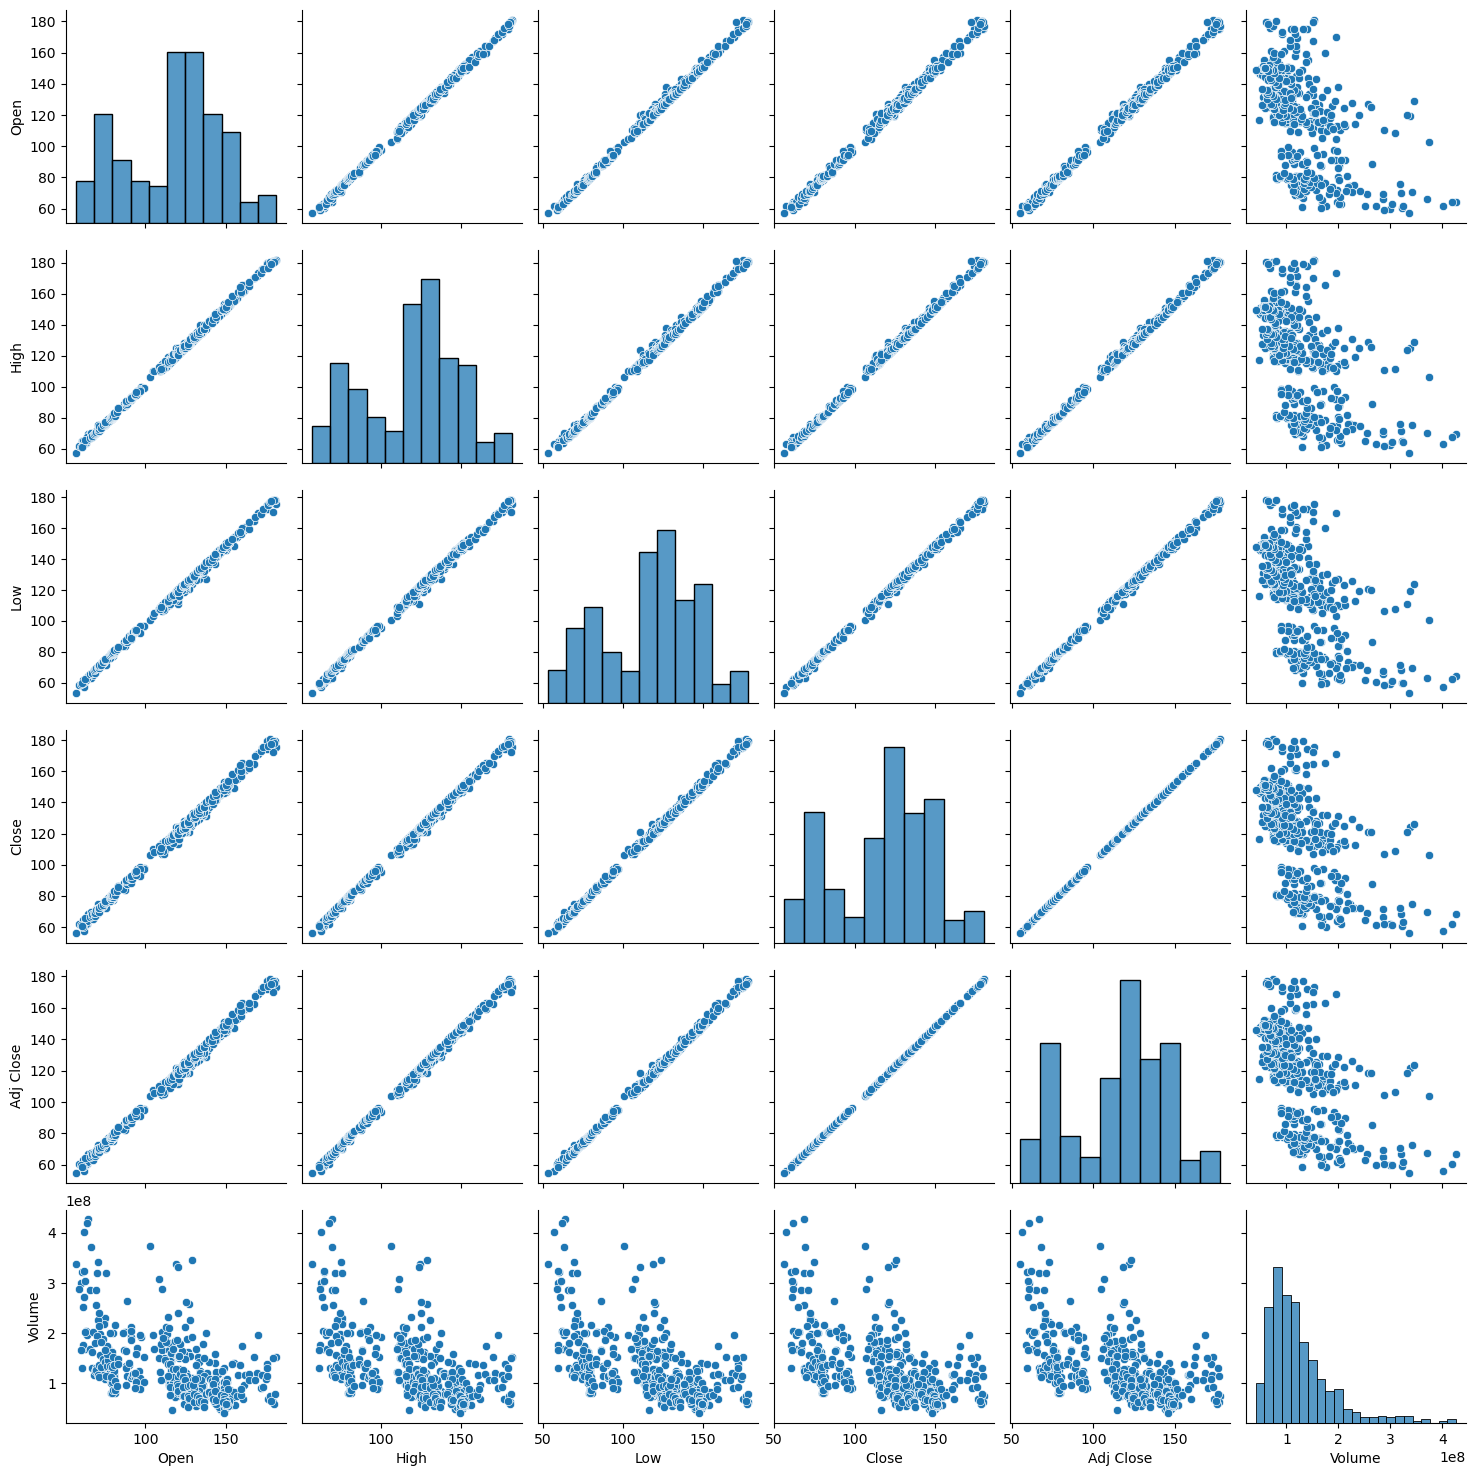

In [56]:
# draw the pairplot
sns.pairplot(data)
plt.show()

**Inference**
- by scatterplot we can say this there's no relation between attributes here

In [58]:
data.Open.value_counts()

127.820000    3
120.500000    2
113.910004    2
115.550003    2
124.680000    2
             ..
114.352501    1
116.062500    1
114.830002    1
114.430000    1
178.089996    1
Name: Open, Length: 493, dtype: int64

In [60]:
data.High.value_counts()

149.440002    2
144.300003    2
116.000000    2
151.570007    2
80.860001     2
             ..
118.392502    1
117.162498    1
116.087502    1
115.000000    1
179.229996    1
Name: High, Length: 492, dtype: int64

In [62]:
data.Low.value_counts()

114.589996    2
147.679993    2
122.250000    2
150.059998    2
118.150002    2
             ..
113.962502    1
113.044998    1
113.927498    1
110.297501    1
177.259995    1
Name: Low, Length: 492, dtype: int64

In [63]:
data.Volume.value_counts()

135480400    1
107760100    1
74244600     1
81918000     1
105861300    1
            ..
163022400    1
211495600    1
345937600    1
338054800    1
64062300     1
Name: Volume, Length: 505, dtype: int64

In [64]:
data["Adj Close"].value_counts()

89.019402     2
143.386826    2
119.514069    2
124.887527    2
123.036613    1
             ..
122.291428    1
123.302971    1
121.845665    1
115.874382    1
175.340317    1
Name: Adj Close, Length: 501, dtype: int64